In [10]:
import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader as pdr

import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
# define dates for pulling quarterly FRED GDP data using yahoo finance for last 70 years
end = date.today()
start = date(year=end.year - 70, month=1, day=1)

# print start and end date with format YYYY-MM-DD and names of period
print(f"Start Date: {start.strftime('%Y-%m-%d')} ({start.strftime('%B %Y')})")
print(f"End Date: {end.strftime('%Y-%m-%d')} ({end.strftime('%B %Y')})")


Start Date: 1954-01-01 (January 1954)
End Date: 2024-04-16 (April 2024)


#### GDP Data

https://fred.stlouisfed.org/series/GDPPOT

In [6]:
# load real potential GDP data from FRED using pandas_datareader and start and end dates as defined above
gdppot = pdr.DataReader(name='GDPPOT', data_source='fred', start=start, end=end)

In [7]:
gdppot.tail()

,GDPPOT
DATE,
2023-04-01,22246.23
2023-07-01,22369.71
2023-10-01,22495.19
2024-01-01,22618.15
2024-04-01,22739.00


In [11]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail()


,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.005442
2023-07-01,22369.71,0.021719,0.005551
2023-10-01,22495.19,0.022190,0.005609
2024-01-01,22618.15,0.022251,0.005466
2024-04-01,22739.00,0.022151,0.005343


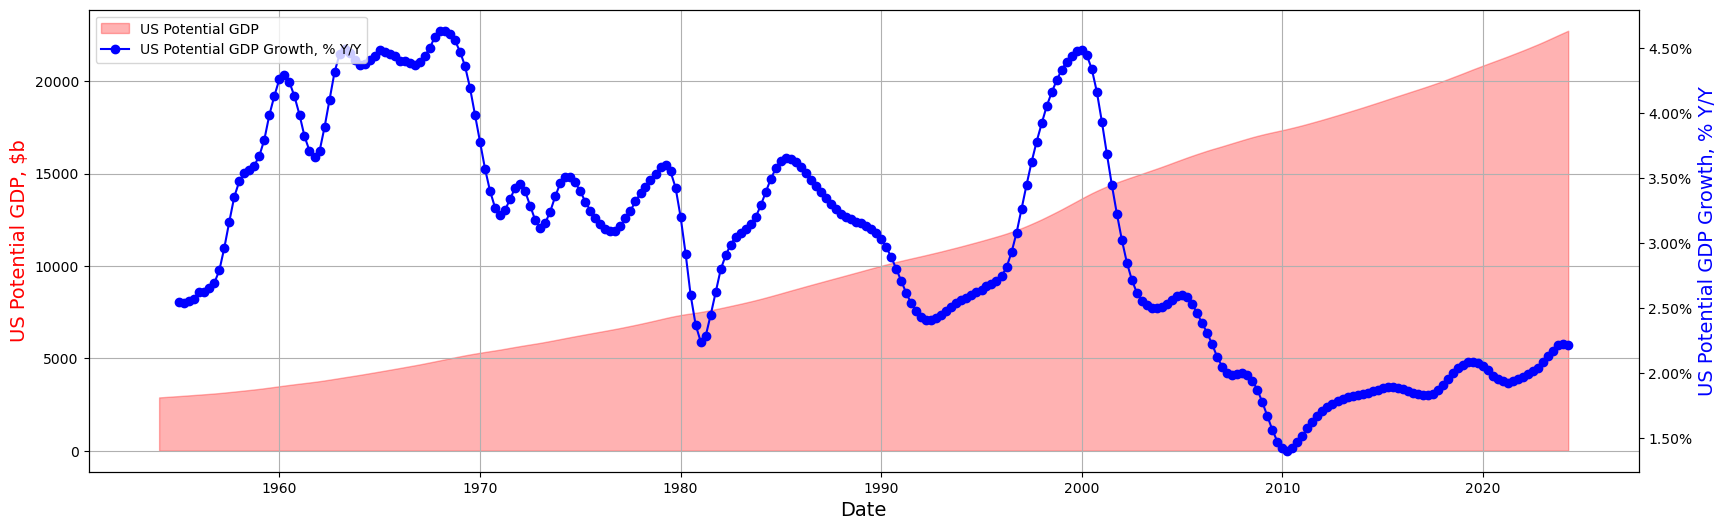

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

#### CPI Data

https://fred.stlouisfed.org/series/CPILFESL

In [15]:
# download core cpi using pandasdatareader and save it as dataframe with name cpilfesl from start and end date
cpilfesl = pdr.DataReader(name='CPILFESL', data_source='fred', start=start, end=end)

In [17]:
# add new column 'cpi_core_yoy' to df 'cpilfesl' using shift function by 12 months
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1

# add new column 'cpi_core_mom' to df 'cpilfesl' using shift function by 1 months
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(10)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2023-06-01,308.245,0.048552,0.001947
2023-07-01,308.945,0.047076,0.002271
2023-08-01,309.656,0.044128,0.002301
2023-09-01,310.644,0.041437,0.003191
2023-10-01,311.390,0.040217,0.002401
2023-11-01,312.349,0.040151,0.003080
2023-12-01,313.209,0.039101,0.002753
2024-01-01,314.438,0.038747,0.003924
2024-02-01,315.565,0.037620,0.003584


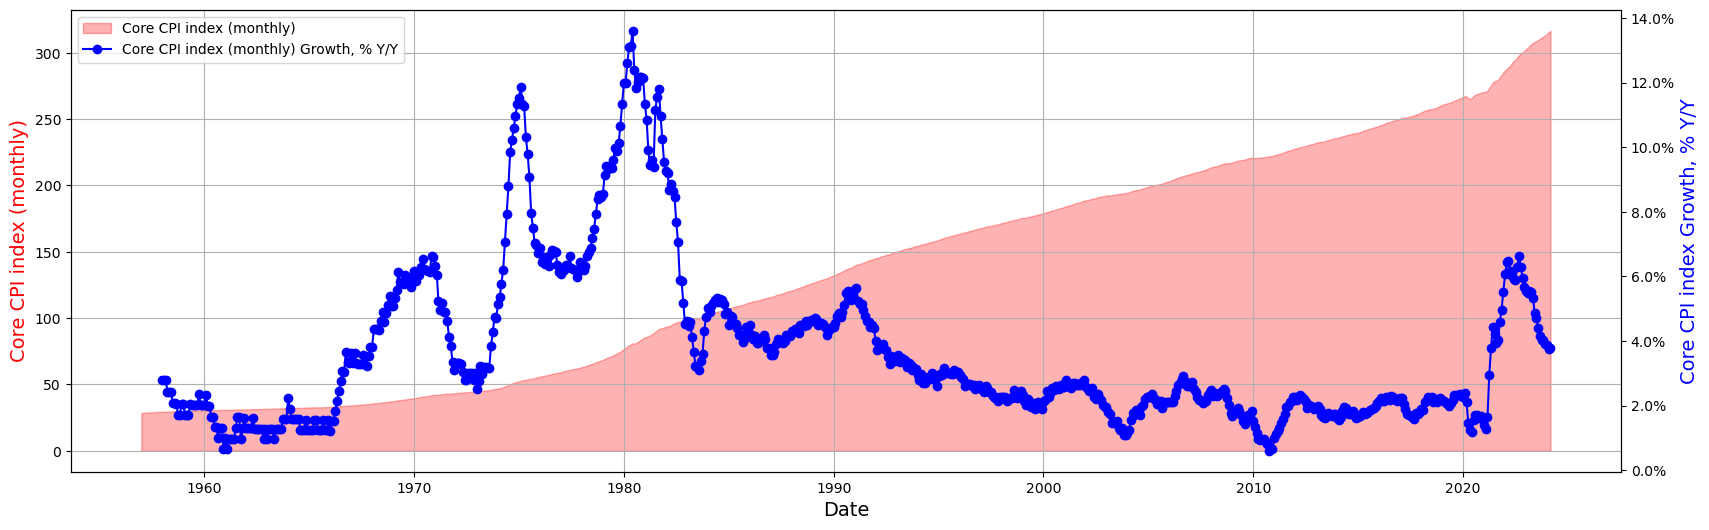

In [18]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()